## Explore the Data

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Load the dataset
data_ad = pd.read_csv('tedsa_puf_2019.csv')
data_dis = pd.read_csv('tedsd_puf_2020.csv')

In [2]:
data_dis

,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2020,1243074,2,-9,3,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
1,2020,1168758,2,-9,3,2,7,-9,29,1,...,0,0,0,0,0,0,9,4,0,1
2,2020,1150846,2,-9,1,1,7,-9,36,1,...,0,0,0,0,0,0,9,4,0,3
3,2020,1121864,2,-9,3,2,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,3
4,2020,1180820,2,-9,3,2,7,-9,36,1,...,0,0,0,0,0,0,9,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391388,2020,1325783,8,-9,4,2,7,-9,36,1,...,0,0,0,0,0,0,8,4,0,1
1391389,2020,1321270,56,-9,1,1,7,3,34,7,...,0,0,0,0,0,0,8,4,0,2
1391390,2020,1277642,56,-9,1,1,7,3,33,7,...,0,0,0,0,0,1,8,4,0,3
1391391,2020,1157485,56,-9,4,4,7,1,35,7,...,0,0,0,0,0,0,8,4,0,1


In [3]:
filtered_dis = data_dis[data_dis['NOPRIOR'] == 0] # Filter No Previous substance use treatment episodes
filtered_dis = data_dis[data_dis['RACE'] == 6] # Filter Asian

column_names = filtered_dis.columns
column_names

Index(['DISYR', 'CASEID', 'STFIPS', 'CBSA2010', 'EDUC', 'MARSTAT', 'SERVICES',
       'DETCRIM', 'LOS', 'PSOURCE', 'NOPRIOR', 'ARRESTS', 'EMPLOY', 'METHUSE',
       'PSYPROB', 'PREG', 'GENDER', 'VET', 'LIVARAG', 'DAYWAIT', 'SERVICES_D',
       'REASON', 'EMPLOY_D', 'LIVARAG_D', 'ARRESTS_D', 'DSMCRIT', 'AGE',
       'RACE', 'ETHNIC', 'DETNLF', 'DETNLF_D', 'PRIMINC', 'SUB1', 'SUB2',
       'SUB3', 'SUB1_D', 'SUB2_D', 'SUB3_D', 'ROUTE1', 'ROUTE2', 'ROUTE3',
       'FREQ1', 'FREQ2', 'FREQ3', 'FREQ1_D', 'FREQ2_D', 'FREQ3_D', 'FRSTUSE1',
       'FRSTUSE2', 'FRSTUSE3', 'HLTHINS', 'PRIMPAY', 'FREQ_ATND_SELF_HELP',
       'FREQ_ATND_SELF_HELP_D', 'ALCFLG', 'COKEFLG', 'MARFLG', 'HERFLG',
       'METHFLG', 'OPSYNFLG', 'PCPFLG', 'HALLFLG', 'MTHAMFLG', 'AMPHFLG',
       'STIMFLG', 'BENZFLG', 'TRNQFLG', 'BARBFLG', 'SEDHPFLG', 'INHFLG',
       'OTCFLG', 'OTHERFLG', 'DIVISION', 'REGION', 'IDU', 'ALCDRUG'],
      dtype='object')

In [5]:
# 10 patient characteristics
data_final = filtered_dis[['AGE','GENDER','RACE','MARSTAT','EMPLOY','EDUC','DETNLF','PREG','LIVARAG','PRIMINC', 
                         'SUB1','LOS','FREQ1','PSYPROB','FRSTUSE1','DSMCRIT',]] 

data_final.dropna(inplace=True) # Drop rows with missing values

X = data_final.drop('DSMCRIT', axis=1)  # Remove target variable from input features
y = data_final['DSMCRIT']  # Target variable

C:\Users\qiany9\AppData\Local\Temp\ipykernel_31820\2104420778.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final.dropna(inplace=True) # Drop rows with missing values


In [ ]:
import seaborn as sns

sns.pairplot(X)

## Concatenating DataFrames from 2018-2020

In [1]:
import pandas as pd
import numpy as np
data_dis18 = pd.read_csv('tedsd_puf_2018.csv')
data_dis19 = pd.read_csv('tedsd_puf_2019.csv')
data_dis20 = pd.read_csv('tedsd_puf_2020.csv')

In [2]:
data_dis = pd.concat([data_dis18, data_dis19, data_dis20], axis=0, ignore_index=True)
print(data_dis.shape)
filtered_dis = data_dis[data_dis['NOPRIOR'] == 0] # Filter No Previous substance use treatment episodes
print(filtered_dis.shape)
filtered_dis = filtered_dis[filtered_dis['RACE'] == 6] # Filter Asian
print(filtered_dis.shape)
filtered_dis = filtered_dis[filtered_dis['SERVICES'] == 7] # Filter 
print(filtered_dis.shape)

(4780262, 76)
(1735005, 76)
(14165, 76)
(8845, 76)


In [3]:
filtered_dis

,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
1239,2018,20181657016,2,-9,4,1,7,-9,32,1,...,0,0,0,0,0,0,9,4,-9,3
1241,2018,20181382164,2,-9,3,2,7,-9,31,1,...,0,0,0,0,0,1,9,4,0,3
2140,2018,20181575801,2,-9,4,4,7,1,35,7,...,0,0,0,0,0,0,9,4,0,3
2141,2018,20181630430,2,-9,4,4,7,-9,34,1,...,0,0,0,0,0,0,9,4,0,3
2511,2018,20181363580,2,11260,3,2,7,-9,34,6,...,0,0,0,0,0,0,9,4,-9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4759636,2020,765264,51,47260,5,-9,7,-9,35,4,...,0,0,0,0,0,0,5,3,0,1
4759756,2020,878177,51,47260,3,-9,7,-9,6,6,...,0,0,0,0,0,0,5,3,0,2
4759757,2020,770660,51,47260,3,-9,7,-9,7,6,...,0,0,0,0,0,0,5,3,0,2
4777771,2020,1338995,56,-9,4,4,7,-9,34,3,...,0,0,0,0,0,0,8,4,0,2


In [4]:
# 13 patient characteristics
data_final = filtered_dis[['MARSTAT','EMPLOY','EDUC','PRIMINC','HLTHINS', 
                           'SUB1','LOS','FREQ1','FREQ1_D','PSYPROB','FRSTUSE1','ROUTE1','REASON',
                           'DSMCRIT',]]

data_final.dropna(inplace=True) # Drop rows with missing values

X = data_final.drop('DSMCRIT', axis=1)  # Remove target variable from input features
y = data_final['DSMCRIT']  # Target variable

C:\Users\qiany9\AppData\Local\Temp\ipykernel_31492\3505508246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final.dropna(inplace=True) # Drop rows with missing values


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

column_names = data_final.columns
column_names

rnd_clf = RandomForestClassifier(n_estimators=500)
rnd_clf.fit(X, y)

feature_importances = rnd_clf.feature_importances_
importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
importances_df = importances_df.sort_values('importance', ascending=False)
importances_df

,feature,importance
0,MARSTAT,0.135965
6,LOS,0.119697
3,PRIMINC,0.105497
5,SUB1,0.098905
4,HLTHINS,0.083071
10,FRSTUSE1,0.076688
2,EDUC,0.076038
1,EMPLOY,0.054013
12,REASON,0.053311
8,FREQ1_D,0.052346


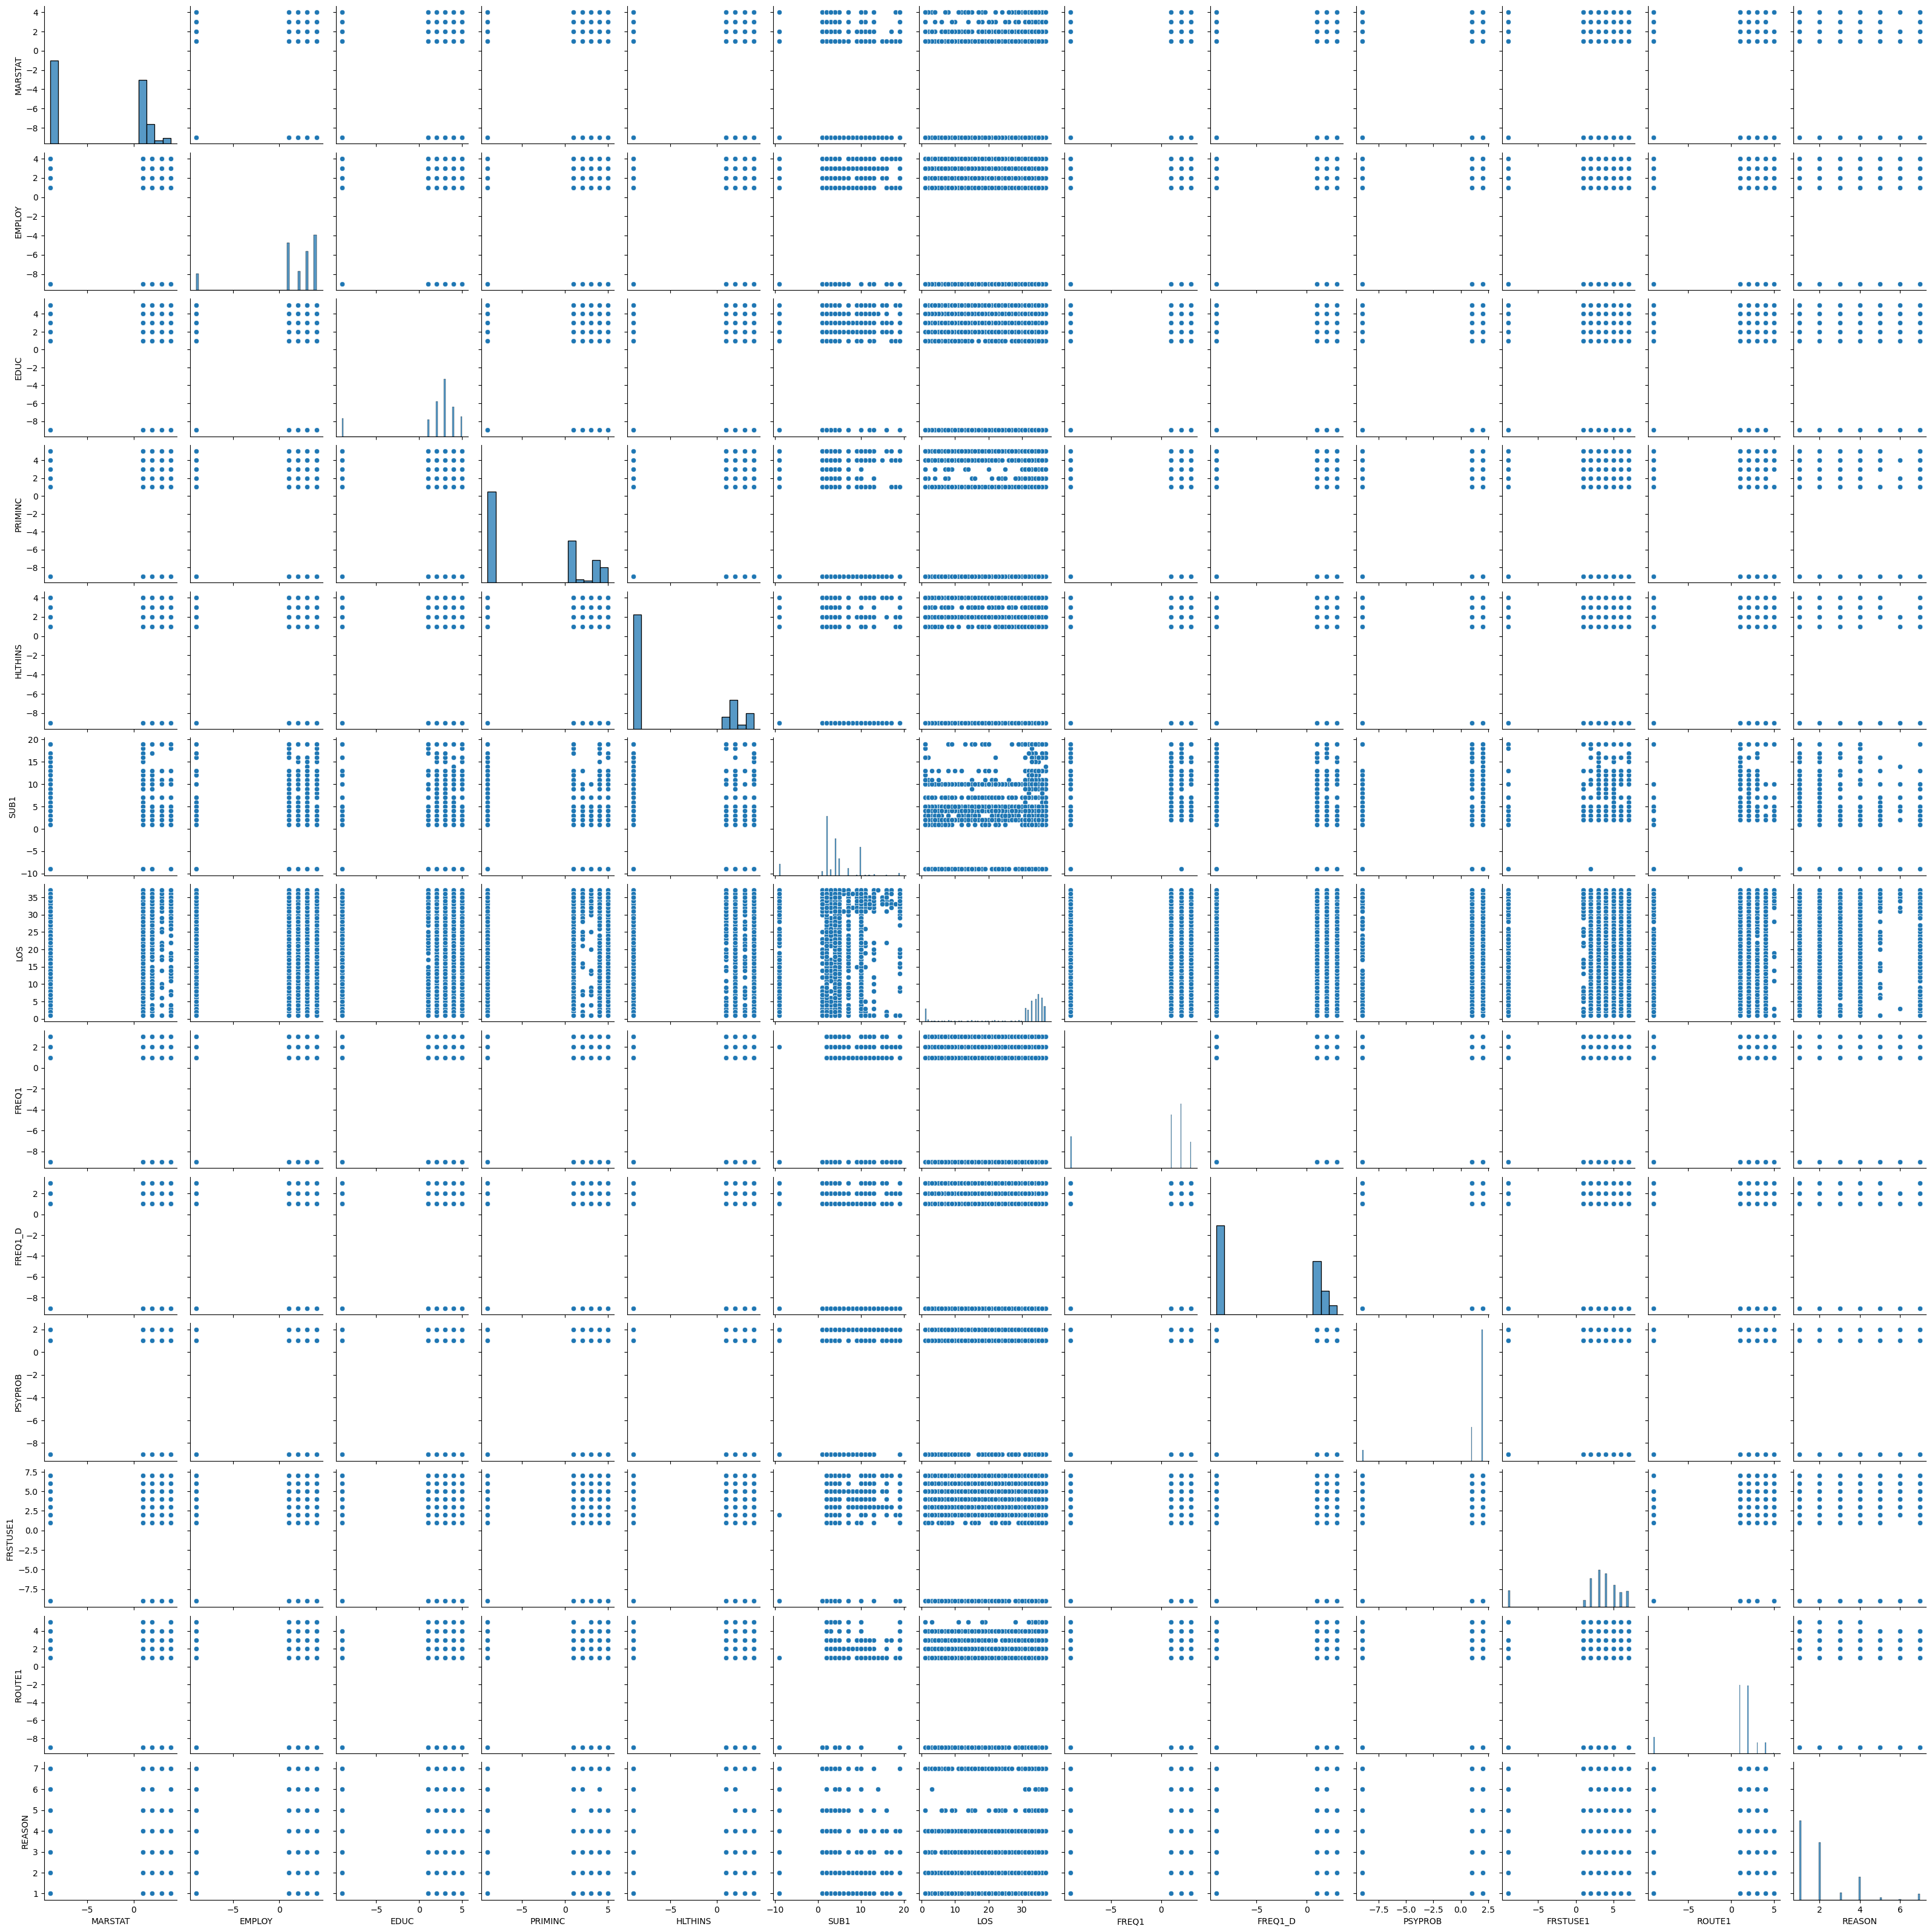

In [6]:
import seaborn as sns

sns.pairplot(X)